## 선형판별분석 (LDA, Linear Discriminant Analysis)

- PCA와 유사하게 입력 데이터 세트를 저차원 공간으로 투영(project)해 차원을 축소하는 기법

- PCA와 다르게 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소

- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소

<center>
 <img src="https://blog.kakaocdn.net/dn/KOqHC/btqGebaAiIc/CKAMR23KhIcmh6UK198bd1/img.png" alt="클래스 간 분산과 내부 분산" width="40%" />

</center>

- LDA는 투영을 통해 가능한 한 클래스를 멀리 떨어지게 하므로 SVM 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는 데 사용

#### LDA 실습 01

붓꽃 데이터 세트에 LDA 적용

In [2]:
# 특성의 분산이 1이 되도록 데이터의 스케일을 조정
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 데이터로드
iris = load_iris()

#스케일 조정 
x = iris.data
y = iris.target

x_scaled = StandardScaler().fit_transform(x)


- LDA는 PCA와 다르게 비지도학습이 아닌 지도학습
- 클래스의 Target 값이 변환 시에 필요

In [3]:
# LDA 모델 학습
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x,y)
x_lda = lda.transform(x)
x_lda.shape

(150, 2)

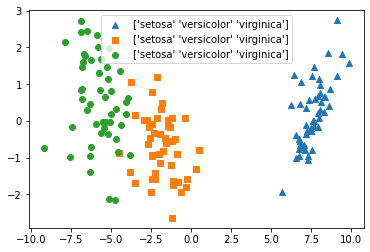

In [5]:
# LDA 변환된 데이터를 시각화
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# DataFrame 변경
df_lda = pd.DataFrame(x_lda,columns = ['lda_components_1','lda_components_2'])
df_lda['target'] = y
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target markers = ['^','s','o']
markers = ['^','s','o']
for i , marker in enumerate(markers):
  x_data = df_lda[df_lda['target'] == i]['lda_components_1']
  y_data = df_lda[df_lda['target'] == i]['lda_components_2']
  plt.scatter(x_data,y_data,marker = marker,label = iris.target_names)

plt.legend()
plt.show()


In [6]:
# 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 램덤 포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

model = RandomForestClassifier(random_state=0)
scores = cross_val_score(model,x,y,scoring = 'accuracy',cv=5)
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
0.9666666666666668


In [7]:
scores = cross_val_score(model,df_lda,y,scoring = 'accuracy',cv=5)
print(scores)
print(scores.mean()) #데이터가 별로 없어서 떨어짐 

[1. 1. 1. 1. 1.]
1.0


## 특이값분해 (SVD, Singular Value Decomposition)

- PCA의 경우 정방행렬(행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있으나 SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에 대해서도 적용 가능

- SVD는 m x n 크기의 행렬 A를 분해

 <center>
 <img src="https://www.pikpng.com/pngl/b/563-5634372_where-a-is-the-input-data-matrix-u.png" alt="특이값분해" width="60%" />

 출처: https://www.pikpng.com/transpng/hxRRmbR/

 </center>

 - 행렬 U와 V에 속한 벡터는 특이 벡터(Singular Vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 갖음
 - ∑는 직사각 대각 행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
 - m < n인 경우 첫번째와 같이 분해되며, m > n인 경우 두번째와 같이 분해
 - ∑의 0이 아닌 대각 원소값을 특이값(Singular Value)라고 함
 

- Truncated SVD는 ∑의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것
 - 데이터 정보가 압축되어 분해되므로 원본 행렬을 정확하게 복원할 수는 없으나 상당 수준의 근사값으로 복원이 가능

#### SVD 실습 01

붓꽃 데이터 세트에 TruncatedSVD 적용

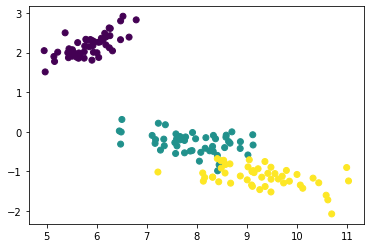

In [8]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
x = iris.data
y = iris.target


# 2개의 주요 component로 TruncatedSVD 변환
tavd = TruncatedSVD(n_components=2,random_state=0)
tavd.fit(x)
x_tavd = tavd.transform(x)
x_tavd.shape
# TruncatedSVD 변환 된 데이터 산점도. 품종은 색깔로 구분 #뚜력하게 그룹끼리 묶여 있는것을 확인
plt.scatter(x_tavd[:,0],x_tavd[:,1],c=y)

- PCA와 유사하게 변환 후 품종별로 클러스터링이 가능할 정도의 고유성을 가지고 있음

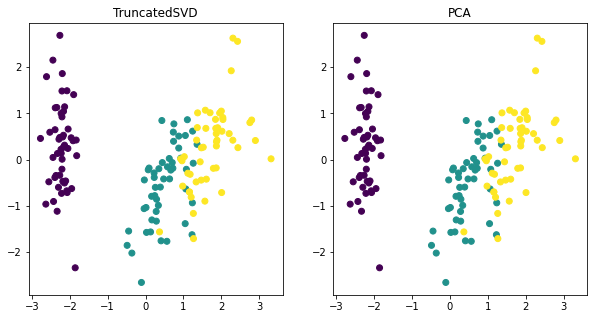

In [9]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
x_scaled = StandardScaler().fit_transform(x)
# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tavd = TruncatedSVD(n_components=2,random_state=0)
x_tavd = tavd.fit_transform(x_scaled) 
# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2,random_state=0)
x_pca = pca.fit_transform(x_scaled) 
# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
# TruncatedSVD 변환 된 데이터 산점도. 품종은 색깔로 구분 #뚜력하게 그룹끼리 묶여 있는것을 확인
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].scatter(x_tavd[:, 0], x_tavd[:, 1], c=y)
ax[0].set_title('TruncatedSVD')
ax[1].scatter(x_pca[:, 0], x_pca[:, 1], c=y)
ax[1].set_title('PCA')

plt.show()

- 스케일링된 데이터를 기반으로 변환하면 두 개가 거의 동일함

In [10]:
# 평균값 비교
print((x_pca - x_tavd).mean())
print((pca.components_ - tavd.components_).mean())

2.3004804080202965e-15
-2.0816681711721685e-17


- 모두 0에 가까운 값으로 2개의 변환이 서로 동일
- 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행

- PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하며 SVD는 희소 행렬(Spares Matrix)에 대한 변환도 가능

- SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됨

## t-SNE(t-Distributed Stochastic Neighbor Embedding)

- 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 알고리즘

- t-SNE는 각 데이터를 2차원에 무작위로 표현한 후 임의로 하나의 데이터를 선정

- t-분포 그래프에서 임의로 선정한 데이터를 기준점으로 하여 다른 데이터와의 거리에 있는 t-분포 값을 선택

- 이 t-분포 값을 친밀도라 하고, 이 친밀도가 가까운 값끼리 묶음


- t-SNE 알고리즘은 원본 특성 공간에서 가까운 포인트는 더 가깝게 멀리있는 포인트는 더 멀어지게 만듬
- 멀리 떨어진 포인트와의 거리를 보존하기 보다는 가까이 있는 포인트에 더 많은 비중을 둠 
- 그러나 PCA처럼 군집이 중복되지 않는다는 장점은 있지만 매번 계산 할 때마다 축의 위치가 바뀌어 다른 모양이 나타남
- 탐색적 분석에서는 유용하지만 지도학습용으로는 거의 사용하지 않음



#### 매니폴드 학습 (Manifold Learning)

- 매니폴드는 다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간
- 많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동 → 매니폴드 학습

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F99231F415B8A48B41805B6" alt="스위스롤" width="60%" />

스위스 롤 데이터셋 투영과 펼쳐놓음 비교

</center>

- 매니폴드 학습은 매니폴드 가정(manifold assumption) 또는 매니폴드 가설(manifold hypothesis)에 의해, 고차원인 실제 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다고 가정

- 매니폴드 가정은 종종 다른 가정과 함께 쓰이기도 함
- 분류나 회귀같은 작업을 하기전에 학습 데이터셋을 저차원의 매니폴드 공간으로 표현하면 더 간단하게 문제를 해결할 수 있음
- 그러나 데이터셋이 어떠한 모양을 하고 있느냐에 따라 학습 속도와 모델의 성능이 달라짐

#### t-SNE 실습 01

손글씨 숫자 데이터셋에 t-SNE 적용

In [11]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.datasets import load_digits

digits = load_digits()

x = digits.data
y = digits.target

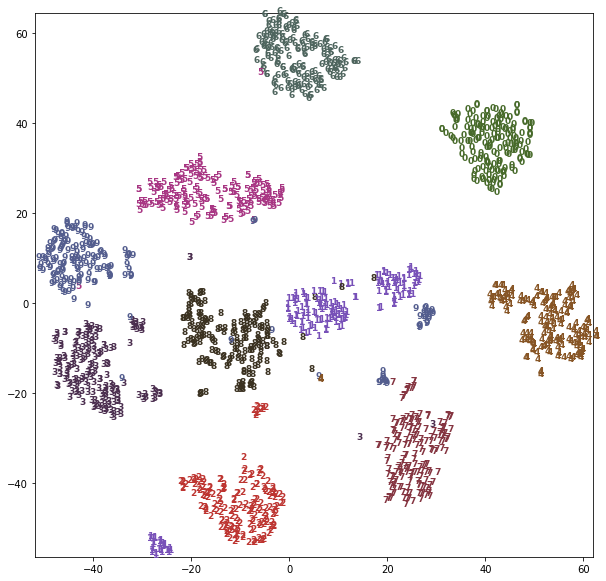

In [16]:
# PCA를 사용해 데이터를 2차원으로 축소하여 시각화
# PCA 모델을 생성
# 처음 두 개의 주성분으로 숫자 데이터를 변환
# 숫자 텍스트를 이용한 산점도
X = digits.data
y = digits.target
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]

plt.figure( figsize=(10, 10) )
plt.xlim(x_tsne[:, 0].min(), x_tsne[:, 0].max())
plt.ylim(x_tsne[:, 1].min(), x_tsne[:, 1].max())

for i in range(len(X)):
  plt.text(x_tsne[i, 0], x_tsne[i, 1], str(y[i]), color=colors[y[i]], 
          fontdict={'weight':'bold', 'size':9})

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

In [14]:
# t-SNE를 적용해 결과를 비교
from sklearn.manifold import TSNE
tsne = TSNE()
x_tsne = tsne.fit_transform(x)



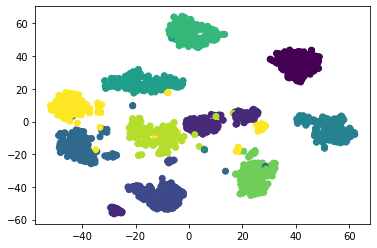

In [15]:
# 처음 두 개의 주성분으로 숫자 데이터를 변환
# 숫자 텍스트를 이용한 산점도
plt.scatter(x_tsne[:,0],x_tsne[:,1],c = y)
plt.show()

- 모든 클래스가 확실히 구분